# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
a = torch.FloatTensor(3, 4)
b = torch.FloatTensor(12,)

c = b.view(2, 2, 3)

a

tensor([[6.1337e-34, 0.0000e+00, 3.7835e-44, 0.0000e+00],
        [       nan, 0.0000e+00, 1.3733e-14, 6.4069e+02],
        [4.3066e+21, 1.1824e+22, 4.3066e+21, 6.3828e+28]])

In [ ]:
a[:, 0]

tensor([6.1337e-34,        nan, 4.3066e+21])

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
a = torch.FloatTensor(5, 2)
b = torch.FloatTensor(1, 10)

c = b.view(5, 2)

In [ ]:
print(a)
print('---------')
print(b)
print('---------')
print(c)

tensor([[6.1338e-34, 0.0000e+00],
        [1.4013e-45, 0.0000e+00],
        [2.8026e-45, 0.0000e+00],
        [1.3788e-14, 3.6423e-06],
        [2.0699e-19, 3.3738e-12]])
---------
tensor([[6.1338e-34, 0.0000e+00, 1.3733e-14, 6.4069e+02, 4.3066e+21, 1.1824e+22,
         4.3066e+21, 6.3828e+28, 0.0000e+00, 0.0000e+00]])
---------
tensor([[6.1338e-34, 0.0000e+00],
        [1.3733e-14, 6.4069e+02],
        [4.3066e+21, 1.1824e+22],
        [4.3066e+21, 6.3828e+28],
        [0.0000e+00, 0.0000e+00]])


In [ ]:
a.add(c)

tensor([[1.2268e-33, 0.0000e+00],
        [1.3733e-14, 6.4069e+02],
        [4.3066e+21, 1.1824e+22],
        [4.3066e+21, 6.3828e+28],
        [2.0699e-19, 3.3738e-12]])

In [ ]:
a.sub(c)

tensor([[-2.9387e-39,  0.0000e+00],
        [-1.3733e-14, -6.4069e+02],
        [-4.3066e+21, -1.1824e+22],
        [-4.3066e+21, -6.3828e+28],
        [ 2.0699e-19,  3.3738e-12]])

In [ ]:
a.mul(c)

tensor([[0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [1.2070e-23, 0.0000e+00],
        [5.9379e+07, 2.3248e+23],
        [0.0000e+00, 0.0000e+00]])

In [ ]:
a.div(c)

tensor([[1.0000e+00,        nan],
        [1.0204e-31, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [3.2016e-36, 5.7064e-35],
        [       inf,        inf]])

### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

In [ ]:
images = torch.IntTensor(100, 200, 200, 3).zero_()

In [ ]:
for n in range(100):
  images[n, n*2, :, :] = 255
  images[n, n*2 + 1, :, :] = 255

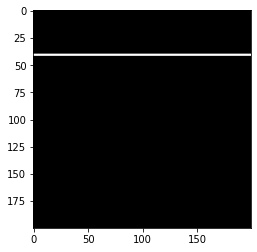

In [ ]:
plt.imshow(images[20])

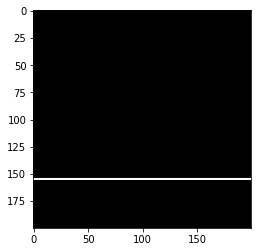

In [ ]:
plt.imshow(images[77])

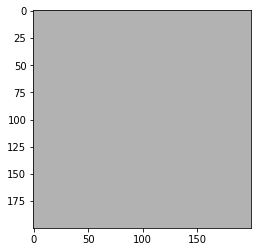

In [ ]:
plt.imshow(images.float().mean(0).mul(70).int())

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [ ]:
from torch.autograd import Variable

In [ ]:
a = torch.FloatTensor(2, 3, 4).uniform_().cuda()
b = torch.FloatTensor(1, 8, 3).uniform_().cuda()

In [ ]:
c = b.view(a.shape)

In [ ]:
a = Variable(a.cpu(), requires_grad=True)
c = Variable(c.cpu(), requires_grad=True)

In [ ]:
L = torch.mean((c - a)**2)

In [ ]:
L.backward()

In [ ]:
c.grad

tensor([[[ 0.0731,  0.0463,  0.0277, -0.0415],
         [-0.0090,  0.0218, -0.0216, -0.0015],
         [-0.0237,  0.0130,  0.0287,  0.0082]],

        [[-0.0114, -0.0192,  0.0149,  0.0210],
         [ 0.0413, -0.0330, -0.0254,  0.0104],
         [-0.0011, -0.0122,  0.0389,  0.0612]]])